In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

PreProcessing Data

In [ ]:
from sklearn import preprocessing

In [ ]:
lb_enc = preprocessing.LabelEncoder()
print(data['gender'].unique())
data['gender'] = lb_enc.fit_transform(data['gender'])
data['gender'].unique()

['Male' 'Female' 'Other']


array([1, 0, 2])

In [ ]:
print(data['work_type'].unique())
data['work_type'] = lb_enc.fit_transform(data['work_type'])
data['work_type'].unique()

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


array([2, 3, 0, 4, 1])

In [ ]:
print(data['ever_married'].unique())
data['ever_married'] = lb_enc.fit_transform(data['ever_married'])
data['ever_married'].unique()

['Yes' 'No']


array([1, 0])

In [ ]:
data['smoking_status'] = data['smoking_status'].replace(['Unknown'],'never smoked')

In [ ]:
print(data['smoking_status'].unique())
data['smoking_status'] = lb_enc.fit_transform(data['smoking_status'])
data['smoking_status'].unique()

['formerly smoked' 'never smoked' 'smokes']


array([0, 1, 2])

In [ ]:
print(data['Residence_type'].unique())
data['Residence_type'] = lb_enc.fit_transform(data['Residence_type'])
data['Residence_type'].unique()

['Urban' 'Rural']


array([1, 0])

In [ ]:
data.shape

(5110, 12)

In [ ]:
pd.DataFrame.corr(data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.003084,-0.004533,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026678,-0.022364,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.333398,-0.110513,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.167811,-0.019199,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.041357,-0.016367,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.341695,-0.046820,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.304876,-0.020051,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000122,0.012160,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.175502,-0.033910,0.131945
bmi,0.003084,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,-0.015378,0.042374


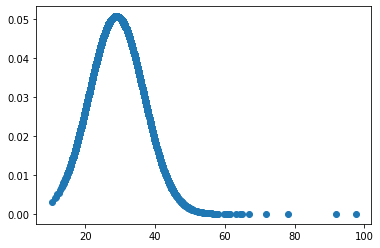

In [ ]:
from scipy.stats import norm
plt.plot(data['bmi'], norm.pdf(data['bmi'], data['bmi'].mean(), data['bmi'].std()),'o')

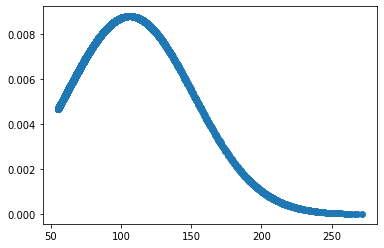

In [ ]:
plt.plot(data['avg_glucose_level'], norm.pdf(data['avg_glucose_level'], data['avg_glucose_level'].mean(), data['avg_glucose_level'].std()),'o')

In [ ]:
for i in data.columns:     #df.columns[w:] if you have w column of line description 
    data[i] = data[i].fillna(data[i].median() )
print(data.isnull().any())

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool


In [ ]:
data.isna().sum()#data = data.fillna(value=0)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

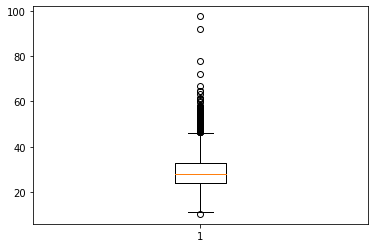

In [ ]:
plt.boxplot(data['bmi'])
plt.show()

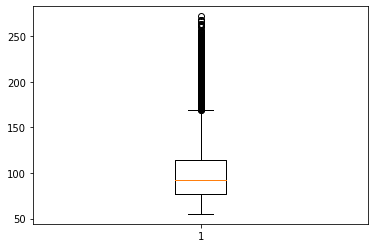

In [ ]:
plt.boxplot(data['avg_glucose_level'])
plt.show()

Outlier Treatment

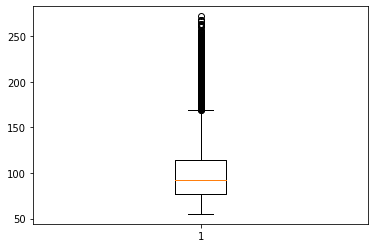

In [ ]:
plt.boxplot(data['avg_glucose_level'])
plt.show()

In [ ]:
print(data['avg_glucose_level'].quantile(0.7))
print(data['avg_glucose_level'].quantile(0.9))
data['avg_glucose_level'] = np.where(data['avg_glucose_level']>data['avg_glucose_level'].quantile(0.8),data['avg_glucose_level'].quantile(0.8),data['avg_glucose_level'])

108.516
192.18100000000007


In [ ]:
print(data['bmi'].quantile(0.8))
print(data['bmi'].quantile(0.9))
data['bmi'] = np.where(data['bmi']>data['bmi'].quantile(0.9),data['bmi'].quantile(0.80),data['bmi'])

34.3
38.7


In [ ]:
print(data['bmi'].quantile(0.25))
data['bmi'] = np.where(data['bmi']<data['bmi'].quantile(0.25),data['bmi'].quantile(0.05),data['bmi'])

23.8


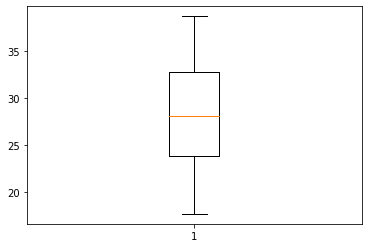

In [ ]:
plt.boxplot(data['bmi'])
plt.show()

In [ ]:
data['bmi'].describe()

count    5110.000000
mean       27.227065
std         6.422457
min        17.700000
25%        23.800000
50%        28.100000
75%        32.800000
max        38.700000
Name: bmi, dtype: float64

In [ ]:
corr = pd.DataFrame.corr(data)


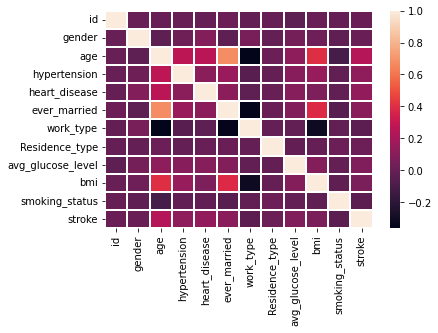

In [ ]:
sns.heatmap(corr,linewidth=1)

In [ ]:
corr

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,-0.027359,0.005358,-0.004533,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.045926,0.021931,-0.022364,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.123741,0.399359,-0.110513,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.105461,0.153182,-0.019199,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.097685,0.073572,-0.016367,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.085670,0.386410,-0.046820,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.019157,-0.316108,-0.020051,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.013146,-0.000406,0.012160,0.015458
avg_glucose_level,-0.027359,0.045926,0.123741,0.105461,0.097685,0.085670,-0.019157,-0.013146,1.000000,0.095626,-0.009888,0.076741
bmi,0.005358,0.021931,0.399359,0.153182,0.073572,0.386410,-0.316108,-0.000406,0.095626,1.000000,-0.021591,0.060262


In [ ]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,94.133569,27.227065,0.981213,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,21.276594,6.422457,0.572105,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,17.700000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,1.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,1.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,1.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,124.160000,38.700000,2.000000,1.000000


In [ ]:
list = ['id','ever_married','work_type', 'Residence_type','stroke']

In [ ]:
data['age'] = data['age'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 479.2 KB


In [ ]:
X = data.drop(list,axis=1)
y = data['stroke']

In [ ]:
print(X.shape)
print(y.shape)

(5110, 7)
(5110,)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()

In [ ]:
X, y = os.fit_resample(X,y)

In [ ]:
print(X.shape)
print(y.shape)

(9722, 7)
(9722,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [ ]:
print(X_test)

      gender  age  hypertension  heart_disease  avg_glucose_level   bmi  \
8010       0   56             0              0             124.16  34.3   
5037       0   46             0              0              64.09  25.3   
1018       0   63             0              0              85.60  25.9   
4797       1   48             0              0              76.58  27.4   
8404       0   65             0              0             100.98  28.2   
...      ...  ...           ...            ...                ...   ...   
7328       0   71             0              0             124.16  38.7   
4397       0   64             0              0              95.87  17.7   
2025       0   54             0              0             124.16  30.9   
1134       1    1             0              0              93.74  17.7   
5288       1   71             0              1              81.76  28.1   

      smoking_status  
8010               0  
5037               1  
1018               1  
4797   

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [ ]:
import pickle
pickle.dump(scaler, open('datascaler.pkl','wb'))


In [ ]:
print(X_train)
print(X_test)


[[-0.86080773 -0.35816419 -0.46814165 ...  1.10852779 -0.69941649
   0.09378091]
 [ 1.16047902 -0.04443267 -0.46814165 ... -0.73340557 -0.27381863
  -1.51268194]
 [ 1.16047902 -1.25453996 -0.46814165 ...  0.74965134  0.01558793
   0.09378091]
 ...
 [-0.86080773 -0.17888903 -0.46814165 ...  1.19106937  0.01558793
   0.09378091]
 [ 1.16047902  0.26929885 -0.46814165 ...  1.19106937  0.01558793
   0.09378091]
 [-0.86080773  0.49339279  2.13610558 ...  0.84968815  0.52630537
  -1.51268194]]
[[-0.86550605  0.05868536 -0.47495564 ...  1.1963676   1.07602314
  -1.48649057]
 [-0.86550605 -0.39193849 -0.47495564 ... -1.47275443 -0.46450955
   0.12063792]
 [-0.86550605  0.37412205 -0.47495564 ... -0.51698924 -0.36180737
   0.12063792]
 ...
 [-0.86550605 -0.03143941 -0.47495564 ...  1.1963676   0.49404413
  -1.48649057]
 [ 1.15539343 -2.4197458  -0.47495564 ... -0.15530032 -1.76540382
   0.12063792]
 [ 1.15539343  0.73462113 -0.47495564 ... -0.68761399  0.01476729
   1.72776642]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
import pickle
pickle.dump(lr, open('linearRegTry.pkl','wb'))


In [ ]:
loaded_lr = pickle.load(open('/content/linearRegTry.pkl','rb'))
result = loaded_lr.score(X_test, y_test)

In [ ]:
print(result)

0.7686375321336761


In [ ]:
y_pred = loaded_lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7686375321336761

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro')

0.7683459917041265

In [ ]:
from sklearn.svm import SVC

In [ ]:
SupportVectorClassModel = SVC() 
SupportVectorClassModel.fit(X_train,y_train)  

SVC()

In [ ]:
y_pred_SVC = SupportVectorClassModel.predict(X_test)

In [ ]:
accuracySVC = accuracy_score(y_test,y_pred_SVC)*100 

In [ ]:
accuracySVC

79.94858611825192

In [ ]:
f1_score(y_test, y_pred_SVC, average='macro')

0.7987068196871656

In [ ]:
f1_score(y_test, y_pred_SVC,)

0.8112294288480156

In [ ]:
f1_score(y_test, y_pred_SVC, average='micro')

0.7994858611825192

In [ ]:
trueCount=0
falseCount=0
for i in y_pred_SVC:
  if(i==1):
    trueCount=trueCount+1
  else:
    falseCount=falseCount+1
print(trueCount,"  ",falseCount)

1116    829


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators = 100)
randfor.fit(X_train,y_train)
y_pred_Randfor = randfor.predict(X_test)

In [ ]:
for i in X_test:
  print(i)

[-0.86550605  0.05868536 -0.47495564 -0.35345113  1.1963676   1.07602314
 -1.48649057]
[-0.86550605 -0.39193849 -0.47495564 -0.35345113 -1.47275443 -0.46450955
  0.12063792]
[-0.86550605  0.37412205 -0.47495564 -0.35345113 -0.51698924 -0.36180737
  0.12063792]
[ 1.15539343 -0.30181372 -0.47495564 -0.35345113 -0.91777966 -0.10505192
  0.12063792]
[-0.86550605  0.46424682 -0.47495564 -0.35345113  0.16639842  0.03188432
 -1.48649057]
[-0.86550605  1.05005782 -0.47495564 -0.35345113 -1.33056714 -0.58432876
  0.12063792]
[ 1.15539343 -1.47343572 -0.47495564 -0.35345113  1.10483454 -1.76540382
  1.72776642]
[-0.86550605  0.32905967  2.10545978 -0.35345113  0.28681328  1.23007641
  1.72776642]
[ 1.15539343 -1.38331095 -0.47495564 -0.35345113 -1.1083995  -1.76540382
  0.12063792]
[-0.86550605  1.05005782 -0.47495564 -0.35345113 -1.33056714 -0.58432876
  0.12063792]
[ 1.15539343 -0.03143941 -0.47495564 -0.35345113 -0.48766311  1.21295938
 -1.48649057]
[ 1.15539343  1.18524497 -0.47495564 -0.353

In [ ]:

for i in y_pred_Randfor:
  print(i)

1
0
0
0
1
1
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
0
1
0
0
1
1
0
1
1
1
0
1
0
1
0
0
1
0
0
0
0
1
1
1
0
1
1
0
0
1
0
1
1
0
0
1
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
1
0
1
1
0
0
0
1
0
1
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
0
1
0
1
1
0
1
1
1
1
0
1
0
1
1
0
0
1
1
1
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
1
0
1
1
1
1
0
1
1
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
1
1
0
1
1
0
0
1
0
1
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
1
1
0
0
1
0
1
0
0
1
1
1
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
1
0
0
1
1
0
1
1
1
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
1
1
1
1
0
0
1
1
0
1
0
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
1
1
1
1
1
1
0
1
0
1
0
0
1
1
0
0
1
0
1
0
1
1
1
0
0
0
0
0
1
0
0
0
1
0
1
1
0
1
0
0
1
0
0
1
1
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
0
0
0
0
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
0
0
1
0
0
1
1
1
0
1
0
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
0
1
0
1
1
1
1
0
1
1
0
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
1
1
1
0


In [ ]:
randfor.predict([[ 0.15539343,  0.73462113, -0.47495564,  0.82924542, -0.68761399,  0.01476729,1.72776642]])

array([1])

In [ ]:
accuracyRandfor = (accuracy_score(y_test,y_pred_Randfor))*100

In [ ]:
accuracyRandfor

98.25192802056554

In [ ]:
pickle.dump(randfor, open('randfor96.pkl','wb'))

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_Randfor, average='macro')

0.9825148384585771

In [ ]:
f1_score(y_test, y_pred_Randfor, average='weighted')

0.982521286155949

In [ ]:
f1_score(y_test, y_pred_Randfor, average='micro')

0.9825192802056555

In [ ]:
f1_score(y_test, y_pred_Randfor)

0.9822361546499477